# Import Librairies

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score

# Reading data set

In [2]:
data = pd.read_csv("tripadvisor_review.csv")

In [3]:
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# DataSet discovery

In [4]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [6]:
data.dtypes

User ID         object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

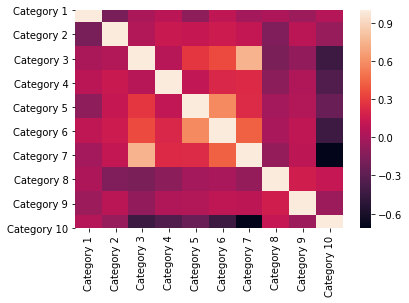

In [9]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [10]:
data.isna().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18217510>,
      dtype=object)

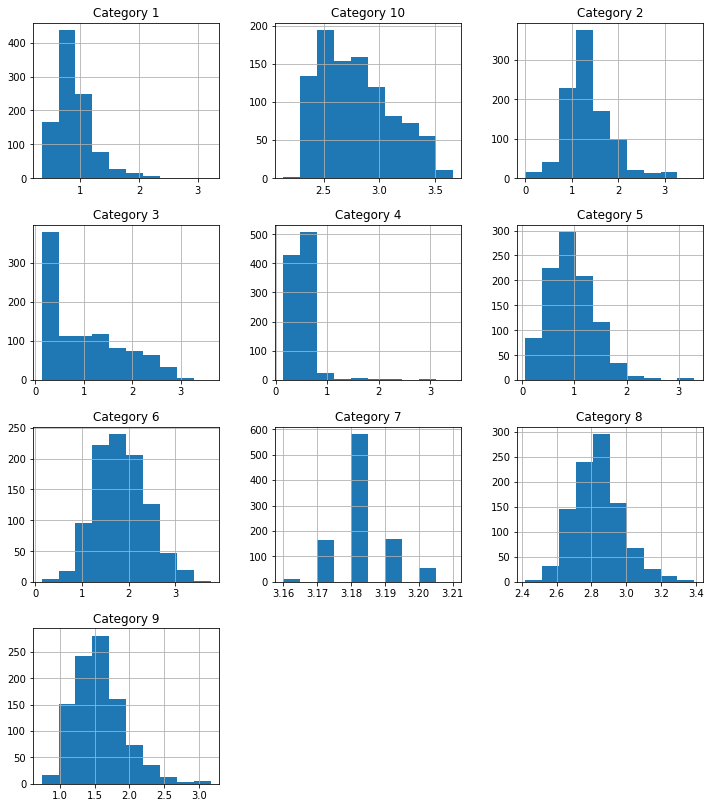

In [11]:
data.hist(figsize = (12,14))



# DataSet transformation

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[data.columns[1:]])

data_scale = pd.DataFrame(scaler.transform(data[data.columns[1:]]), columns=data.columns[1:])

In [19]:
data_scale.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


# Data Clustering with K-Means and Score

In [63]:
kmeans_n3 = KMeans(n_clusters = 3).fit(data_scale)
score = silhouette_score(data_scale, kmeans_n3.labels_, metric='euclidean')
score

0.19916231055254455

In [64]:
kmeans_n4 = KMeans(n_clusters = 4).fit(data_scale)
score = silhouette_score(data_scale, kmeans_n4.labels_, metric='euclidean')
score

0.2184978348659886

In [65]:
kmeans_n5 = KMeans(n_clusters = 5).fit(data_scale)
score = silhouette_score(data_scale, kmeans_n5.labels_, metric='euclidean')
score

0.21697635065373214

D'après le silhouette score le nombre de cluster optimal est 4

# KMEAN Evaluation Elbow

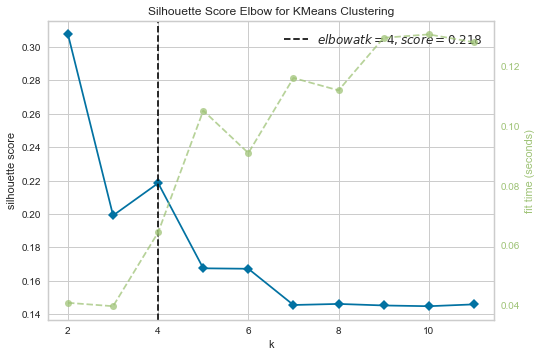

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(data_scale)
visualizer.poof()

D'après l'elbow curve, le nombre de cluster optimal est également de 4 

# KMEAN Vizualisation with scatter plot

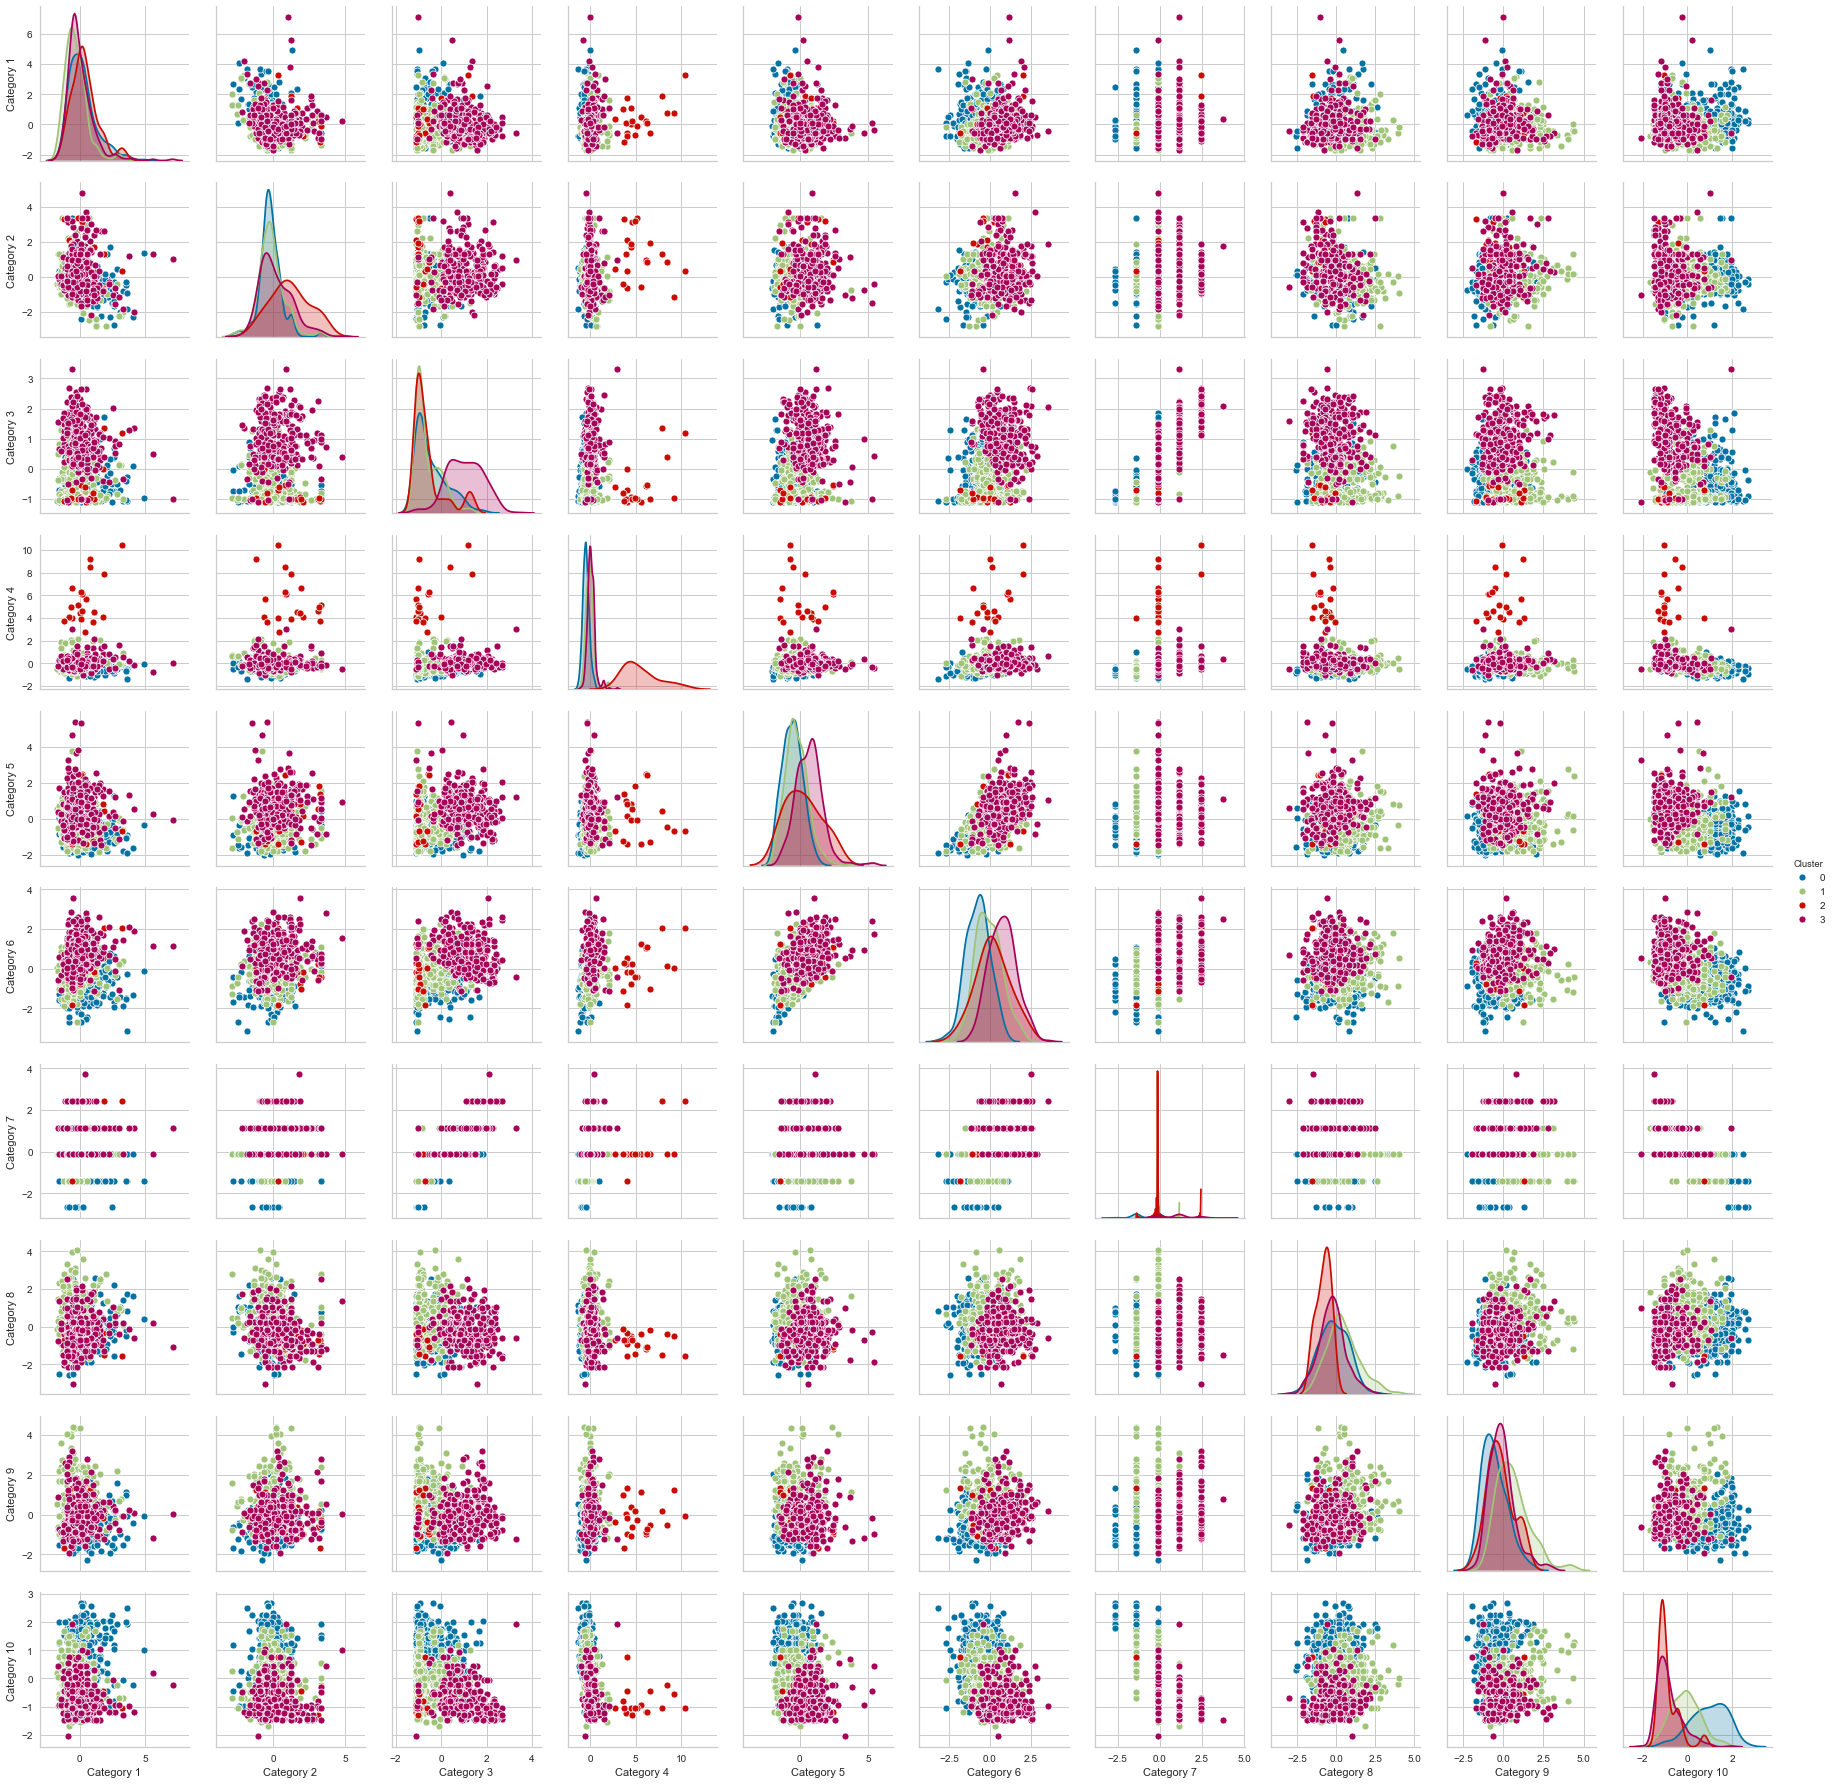

In [70]:
model = KMeans(n_clusters=4)
model.fit(data_scale)
data_scale['Cluster'] = model.predict(data_scale)
sns.pairplot(data_scale, hue='Cluster', vars=data_scale.columns[:-1])

# KMEAN PCA

In [73]:
pca = PCA()
pca.fit(data_scale)
pca_x = pca.transform(data_scale)

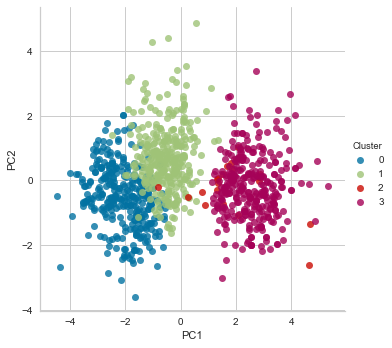

In [74]:
df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
df.columns = ['PC1', 'PC2']
df = pd.concat([df, data_scale['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=df, hue='Cluster', fit_reg=False)

Les clusters 2 et 3 ne semblent pas bien distingué. 

# Data Clustering with DBSCAN

In [78]:
Dbscan = DBSCAN().fit(data_scale)
data['labels_DBSCAN'] = Dbscan.labels_

In [79]:
data['labels_DBSCAN'].value_counts()

-1    980
Name: labels_DBSCAN, dtype: int64

DBSCAN ne trouve que des outliers. Cette méthode ne semble pas adapté à ce data set

# Data Clustering with Spectral cluster and Score

In [103]:
clustering_n2 = SpectralClustering(n_clusters=2).fit(data_scale)
score = silhouette_score(data_scale, clustering_n2.labels_, metric='euclidean')
score

0.4152058023645865

In [104]:
clustering_n3 = SpectralClustering(n_clusters=3).fit(data_scale)
score = silhouette_score(data_scale, clustering_n3.labels_, metric='euclidean')
score

0.5286559613136793

In [105]:
clustering_n4 = SpectralClustering(n_clusters=4).fit(data_scale)
score = silhouette_score(data_scale, clustering_n4.labels_, metric='euclidean')
score

0.4212987238091287

D'après le silhouette score le nombre de cluster optimal est 3

# Spectral cluster Evaluation Elbow

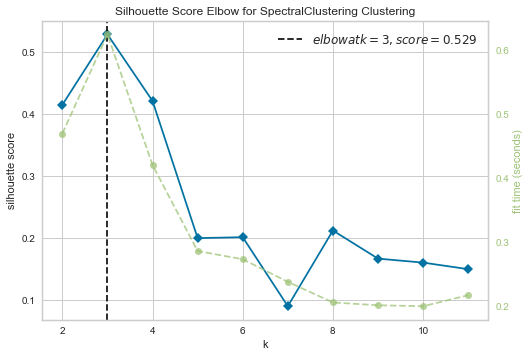

In [101]:
model = SpectralClustering()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(data_scale)
visualizer.poof()

# KMEANS / Spectral Cluster with Adjusted Rand Score

In [106]:
adjusted_rand_score(kmeans_n4.labels_,clustering_n3.labels_)

0.007223000327964114

Les cluster des deux modèles sont totalement différents